In [141]:
import pandas as pd
import numpy as np
from IPython.core.display import display, HTML
display(HTML("<style>.container { width:100% !important; }</style>"))

In [8]:
pp=pd.read_excel('C:/Users/garyp/Desktop/Jobs/Interview/Paddy Power/Task - Decision Analyst.xlsx',1,header=1)
pp

,Wave,Survey_Date,Customer_ID,First_Bet_date,Reg Year,bet_in_play,First Deposit Amount,CCY_Code,Sports Preference,Device_Preference,...,Extra_Places,Quick_Settlement_Time,Easy_to_use_Website,Good_Mobile_App_Mobile_Site,Range_of_Markets,Live_Betting,Rewarding_Loyalty,Fairness_to_Customer,Easy_to_deposit_and_withdraw,Customer_Service
0,1,2011-11-01,1066736,2007-09-18,2007,1,147.9,GBP,Soccer,Desktop,...,3,3,2,5,3,5,5,3,3,NaN
1,1,2011-11-01,1122336,2007-12-09,2007,0,276.9,GBP,Soccer,Desktop,...,4,3,5,3,4,4,5,3,5,NaN
2,1,2011-11-01,1340771,2005-07-02,2005,1,1000.0,EUR,Horse_Racing_and_Soccer,Desktop,...,4,3,5,2,4,2,5,3,5,NaN
3,1,2011-11-01,1432391,2004-03-20,2004,0,147.1,GBP,Horse_Racing_and_Soccer,Desktop,...,NaN,NaN,NaN,2,NaN,4,5,NaN,NaN,NaN
4,1,2011-11-01,1449406,2008-12-26,2008,0,2118.6,GBP,Horse_Racing,Desktop,...,3,3,2,5,3,3,5,3,3,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11256,11,2014-05-01,4425869,2008-04-10,2008,1,17.0,EUR,Horse_Racing_and_Soccer,Mobile,...,5,5,5,5,5,4,3,5,5,5
11257,11,2014-05-01,4475330,2013-11-09,2013,1,10.0,GBP,Horse_Racing,Mobile,...,5,5,5,5,5,5,3,5,5,5
11258,11,2014-05-01,4491913,2013-03-29,2013,1,7.0,EUR,Soccer,Desktop,...,5,4,4,5,4,2,3,5,5,5
11259,11,2014-05-01,4497853,2011-11-17,2011,1,20.0,GBP,Horse_Racing,Desktop,...,5,5,5,5,5,5,1,5,5,5


In [109]:
quarters=['2011 Q4','2012 Q1','2012 Q2','2012 Q3','2012 Q4','2013 Q1','2013 Q2','2013 Q3','2013 Q4','2014 Q1','2014 Q2',]

In [117]:
#NON SOLUS
nonsolus = pd.DataFrame({'Other Sites' :[],'Only Us':[]})
for i in pp['Survey_Date'].unique():
    x=pd.DataFrame({"Other Sites":["{:.0%}".format(pp['Non_Solus'][(pp['Non_Solus']=='Yes') & (pp['Survey_Date']==i)].count()/pp['Non_Solus'][pp['Survey_Date']==i].count())],
                        "Only Us":["{:.0%}".format(pp['Non_Solus'][(pp['Non_Solus']=='No') & (pp['Survey_Date']==i)].count()/pp['Non_Solus'][pp['Survey_Date']==i].count())]})
    nonsolus = pd.concat([nonsolus,x])
nonsolus.index=quarters
nonsolus

,Other Sites,Only Us
2011 Q4,59%,41%
2012 Q1,57%,43%
2012 Q2,57%,43%
2012 Q3,57%,43%
2012 Q4,60%,40%
2013 Q1,59%,41%
2013 Q2,58%,42%
2013 Q3,57%,43%
2013 Q4,60%,40%
2014 Q1,58%,42%


In [118]:
#NON SOLUS - Probably best not to set format as percentages as these are strings and cant do much after
nonsolus = pd.DataFrame({'Other Sites' :[],'Only Us':[]})
for i in pp['Survey_Date'].unique():
    x=pd.DataFrame({"Other Sites":[pp['Non_Solus'][(pp['Non_Solus']=='Yes') & (pp['Survey_Date']==i)].count()/pp['Non_Solus'][pp['Survey_Date']==i].count()],
                        "Only Us":[pp['Non_Solus'][(pp['Non_Solus']=='No') & (pp['Survey_Date']==i)].count()/pp['Non_Solus'][pp['Survey_Date']==i].count()]})
    nonsolus = pd.concat([nonsolus,x])
nonsolus.index=quarters 
nonsolus

,Other Sites,Only Us
2011 Q4,0.585770,0.414230
2012 Q1,0.570732,0.429268
2012 Q2,0.570582,0.429418
2012 Q3,0.565302,0.434698
2012 Q4,0.600400,0.399600
2013 Q1,0.591618,0.408382
2013 Q2,0.576271,0.423729
2013 Q3,0.571150,0.428850
2013 Q4,0.596491,0.403509
2014 Q1,0.580433,0.419567


In [126]:
#NON SOLUS - Horse Racing
nonsolus = pd.DataFrame({'Other Sites' :[],'Only Us':[]})
for i in pp['Survey_Date'].unique():
    x=pd.DataFrame({"Other Sites":[pp['Non_Solus'][(pp['Non_Solus']=='Yes') & (pp['Survey_Date']==i) &(pp['Sports Preference']=="Horse_Racing")].count()/pp['Non_Solus'][(pp['Survey_Date']==i)&(pp['Sports Preference']=="Horse_Racing")].count()],
                        "Only Us":[pp['Non_Solus'][(pp['Non_Solus']=='No') & (pp['Survey_Date']==i) &(pp['Sports Preference']=="Horse_Racing")].count()/pp['Non_Solus'][(pp['Survey_Date']==i)&(pp['Sports Preference']=="Horse_Racing")].count()]})
    nonsolus = pd.concat([nonsolus,x])
nonsolus.index=quarters 
nonsolus

,Other Sites,Only Us
2011 Q4,0.511057,0.488943
2012 Q1,0.538462,0.461538
2012 Q2,0.530026,0.469974
2012 Q3,0.495522,0.504478
2012 Q4,0.596491,0.403509
2013 Q1,0.577778,0.422222
2013 Q2,0.545842,0.454158
2013 Q3,0.562500,0.437500
2013 Q4,0.563679,0.436321
2014 Q1,0.525547,0.474453


In [195]:
#NON SOLUS - Soccer
nonsolus = pd.DataFrame()
for i in pp['Survey_Date'].unique():
    x=pd.DataFrame({"Other Sites":[pp['Non_Solus'][(pp['Non_Solus']=='Yes') & (pp['Survey_Date']==i) &(pp['Sports Preference']=="Soccer")].count()/pp['Non_Solus'][(pp['Survey_Date']==i)&(pp['Sports Preference']=="Soccer")].count()],
                        "Only Us":[pp['Non_Solus'][(pp['Non_Solus']=='No') & (pp['Survey_Date']==i) &(pp['Sports Preference']=="Soccer")].count()/pp['Non_Solus'][(pp['Survey_Date']==i)&(pp['Sports Preference']=="Soccer")].count()]})
    nonsolus = pd.concat([nonsolus,x])
nonsolus.index=quarters 
nonsolus

,Other Sites,Only Us
2011 Q4,0.689759,0.310241
2012 Q1,0.640118,0.359882
2012 Q2,0.679245,0.320755
2012 Q3,0.673716,0.326284
2012 Q4,0.680851,0.319149
2013 Q1,0.694611,0.305389
2013 Q2,0.761421,0.238579
2013 Q3,0.637795,0.362205
2013 Q4,0.668810,0.331190
2014 Q1,0.635294,0.364706


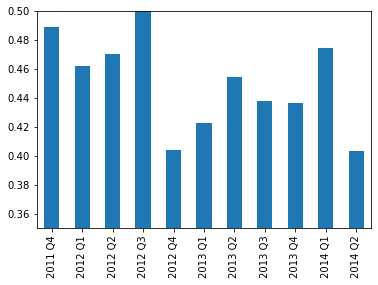

In [131]:
nonsolus['Only Us'].plot.bar(ylim=(0.35,0.5))

In [194]:
#Sports Preference over time
sportpref = pd.DataFrame()
for i in pp['Survey_Date'].unique():
    x=pd.DataFrame({ "Horse Racing":[pp['Sports Preference'][(pp['Sports Preference']=="Horse_Racing")& (pp['Survey_Date']==i)].count()/pp['Sports Preference'][pp['Survey_Date']==i].count()],
    "Soccer":[pp['Sports Preference'][(pp['Sports Preference']=="Soccer")& (pp['Survey_Date']==i)].count()/pp['Sports Preference'][pp['Survey_Date']==i].count()]})
    sportpref = pd.concat([sportpref,x])
sportpref.index=quarters
sportpref

,Horse Racing,Soccer
2011 Q4,0.396686,0.323587
2012 Q1,0.393171,0.330732
2012 Q2,0.378085,0.313919
2012 Q3,0.326511,0.322612
2012 Q4,0.341658,0.328671
2013 Q1,0.307018,0.325536
2013 Q2,0.467597,0.196411
2013 Q3,0.358674,0.247563
2013 Q4,0.413255,0.303119
2014 Q1,0.257761,0.559737


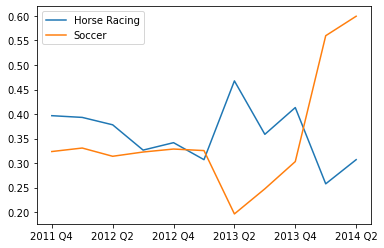

In [145]:
sportpref.plot()

In [192]:
#Other Sites over time by Non_Solus Users
othersites = pd.DataFrame()
for i in pp['Survey_Date'].unique():
    x=pd.DataFrame({ "Ladbrokes":[pp['Ladbrokes_User'][pp['Survey_Date']==i].sum()/pp['Non_Solus'][(pp['Survey_Date']==i)&(pp['Non_Solus']=='Yes')].count()],
                    "Boylesports":[pp['Boylesports_User'][pp['Survey_Date']==i].sum()/pp['Non_Solus'][(pp['Survey_Date']==i)&(pp['Non_Solus']=='Yes')].count()],
                    "Bet365":[pp['Bet365_User'][pp['Survey_Date']==i].sum()/pp['Non_Solus'][(pp['Survey_Date']==i)&(pp['Non_Solus']=='Yes')].count()],
                    "BetFred":[pp['Betfred_User'][pp['Survey_Date']==i].sum()/pp['Non_Solus'][(pp['Survey_Date']==i)&(pp['Non_Solus']=='Yes')].count()],
                    "Skybet":[pp['SkyBet_User'][pp['Survey_Date']==i].sum()/pp['Non_Solus'][(pp['Survey_Date']==i)&(pp['Non_Solus']=='Yes')].count()],
                    "William Hill":[pp['William_Hill_User'][pp['Survey_Date']==i].sum()/pp['Non_Solus'][(pp['Survey_Date']==i)&(pp['Non_Solus']=='Yes')].count()],
                    "Betfair Exchange":[pp['Betfair_EX_User'][pp['Survey_Date']==i].sum()/pp['Non_Solus'][(pp['Survey_Date']==i)&(pp['Non_Solus']=='Yes')].count()]})
    othersites = pd.concat([othersites,x])
othersites.index=quarters

In [193]:
othersites

,Ladbrokes,Boylesports,Bet365,BetFred,Skybet,William Hill,Betfair Exchange
2011 Q4,0.347754,0.173045,0.379368,0.179700,0.329451,0.352745,0.254576
2012 Q1,0.307692,0.158974,0.314530,0.165812,0.341880,0.343590,0.234188
2012 Q2,0.307958,0.147059,0.368512,0.178201,0.323529,0.314879,0.276817
2012 Q3,0.362069,0.124138,0.337931,0.186207,0.291379,0.344828,0.243103
2012 Q4,0.362729,0.133111,0.322795,0.216306,0.332779,0.337770,0.239601
2013 Q1,0.350906,0.149918,0.380560,0.199341,0.304778,0.334432,0.265239
2013 Q2,0.332180,0.121107,0.359862,0.160900,0.344291,0.342561,0.238754
2013 Q3,0.331058,0.134812,0.402730,0.206485,0.298635,0.366894,0.245734
2013 Q4,0.334967,0.163399,0.357843,0.168301,0.313725,0.321895,0.232026
2014 Q1,0.335494,0.144246,0.371151,0.184765,0.312804,0.363047,0.235008


In [ ]:
#SOCW

In [176]:
pp['PP_SOCW']

0        1.000000
1        0.166667
2        0.500000
3        0.500000
4        1.000000
           ...   
11256    0.000000
11257    1.000000
11258    0.009091
11259    0.000000
11260    0.250000
Name: PP_SOCW, Length: 11261, dtype: float64

In [191]:
#SOCW
SOCW = pd.DataFrame()
for i in pp['Survey_Date'].unique():
    x=pd.DataFrame({ "PP SOCW":[pp['PP_SOCW'][pp['Survey_Date']==i].mean()]})
    SOCW = pd.concat([SOCW,x])
SOCW.index=quarters
SOCW

,PP SOCW
2011 Q4,0.642874
2012 Q1,0.660742
2012 Q2,0.708699
2012 Q3,0.671637
2012 Q4,0.637758
2013 Q1,0.642560
2013 Q2,0.609470
2013 Q3,0.701720
2013 Q4,0.647267
2014 Q1,0.558725


In [203]:
#Device preference
device = pd.DataFrame()
for i in pp['Survey_Date'].unique():
    x=pd.DataFrame({ "Desktop":[pp['Device_Preference'][(pp['Device_Preference']=='Desktop')&(pp['Survey_Date']==i)].count()/pp['Device_Preference'][pp['Survey_Date']==i].count()],
                   "Mobile":[pp['Device_Preference'][(pp['Device_Preference']=='Mobile')&(pp['Survey_Date']==i)].count()/pp['Device_Preference'][pp['Survey_Date']==i].count()]})
    device= pd.concat([device,x])
device.index=quarters
device

,Desktop,Mobile
2011 Q4,0.886940,0.094542
2012 Q1,0.863415,0.122927
2012 Q2,0.859822,0.123396
2012 Q3,0.784600,0.204678
2012 Q4,0.748252,0.220779
2013 Q1,0.737817,0.199805
2013 Q2,0.626122,0.331007
2013 Q3,0.639376,0.319688
2013 Q4,0.625731,0.350877
2014 Q1,0.442145,0.540922


In [261]:
#Device Rating
#Shame had to right = 5 or = 4 or =3 . mean(dropna) didnt work, and saying where a in (1,2,3,4,5) didnt either. its ugly but it works
devrating = pd.DataFrame()
for i in pp['Survey_Date'].unique():
    x=pd.DataFrame({ "Desktop":[pp['Easy_to_use_Website'][(pp['Survey_Date']==i)&((pp['Easy_to_use_Website'] == 1)|(pp['Easy_to_use_Website'] == 2)|(pp['Easy_to_use_Website'] == 3)|(pp['Easy_to_use_Website'] == 4)|(pp['Easy_to_use_Website'] == 5))].mean()],
                    "Mobile":[pp['Good_Mobile_App_Mobile_Site'][(pp['Survey_Date']==i)&((pp['Good_Mobile_App_Mobile_Site'] == 1)|(pp['Good_Mobile_App_Mobile_Site'] == 2)|(pp['Good_Mobile_App_Mobile_Site'] == 3)|(pp['Good_Mobile_App_Mobile_Site'] == 4)|(pp['Good_Mobile_App_Mobile_Site'] == 5))].mean()]})
    devrating= pd.concat([devrating,x])
devrating.index=quarters
devrating

,Desktop,Mobile
2011 Q4,3.678010,3.500975
2012 Q1,3.756393,3.512195
2012 Q2,3.731405,3.549852
2012 Q3,3.822193,3.523392
2012 Q4,3.695431,3.501499
2013 Q1,3.785219,3.499025
2013 Q2,3.820966,3.437687
2013 Q3,3.809028,3.497076
2013 Q4,3.817382,3.509747
2014 Q1,3.815648,3.021637


In [188]:
pp['Device_Preference'][pp['Device_Preference']=='Desktop'].count()/pp['Device_Preference'].count()

0.6946985170055945

In [187]:
pp['Device_Preference'].count()

11261

In [ ]:
SOCW = pd.DataFrame({'PP SOCW':[]})
for i in pp['Survey_Date'].unique():
    x=pd.DataFrame({ "PP SOCW":[pp['PP_SOCW'][pp['Survey_Date']==i].mean()]})
    SOCW = pd.concat([SOCW,x])
SOCW.index=quarters
SOCW

In [257]:
pp['Easy_to_use_Website'][(pp['Easy_to_use_Website'] == 1)|(pp['Easy_to_use_Website'] == 2)|(pp['Easy_to_use_Website'] == 3)|(pp['Easy_to_use_Website'] == 4)|(pp['Easy_to_use_Website'] == 5)].mean()

3.781232770978057

In [246]:
a=[1,2,3,4,5]
a

[1, 2, 3, 4, 5]

NotImplementedError: Series.mean does not implement numeric_only.

In [162]:
pp['Ladbrokes_User'][pp['Survey_Date']=='2011-11-01'].sum()/pp['Non_Solus'][(pp['Survey_Date']=='2011-11-01')&(pp['Non_Solus']=='Yes')].count()

0.34775374376039936

In [160]:
pp['Non_Solus'][(pp['Survey_Date']=='2011-11-01')&(pp['Non_Solus']=='Yes')].count()

601

In [82]:
nonsolus = pd.DataFrame({'Other Sites' :[],'Only Us':[]})

In [148]:
pp['Non_Solus']

0        Yes
1        Yes
2         No
3         No
4        Yes
        ... 
11256     No
11257    Yes
11258     No
11259     No
11260    Yes
Name: Non_Solus, Length: 11261, dtype: object

In [154]:
pp['Ladbrokes_User']

0        0.0
1        1.0
2        0.0
3        NaN
4        1.0
        ... 
11256    NaN
11257    0.0
11258    NaN
11259    NaN
11260    1.0
Name: Ladbrokes_User, Length: 11261, dtype: float64